## Ambulance Allocation Through Reinforcement Learning
Francisco Aristi

Boyan Alipiev 


---



# Introduction

Reinforcement learning is often perceived as one of the fundamental blocks of Artificial Intelligence. In the majority of its implementations, it focuses on model-less environments, where an agent ‘learns’ based on his/her actions, the states in which these actions were taken, and the respective reward or punishment the agent receives as a consequence of its decisions. After a finite number of iterations, the agent optimises his/her action given the state that he/she is in in order to maximise its payoff or equivalently, minimise its penalties. 

An emerging problem analysis in Reinforcement Learning is the case when you have two or more different learning agents with different objective functions, where an agent aims to influence the behavior via a mechanism. Literature in this area ranges from Mechanism Design in Game Theory to multi-agent system with learning behavior and a coordination mechanism.[5][8]

This paper analyses the coordination problem in an Ambulance System. The patients arrive randomly across regions, and the rate of arrival is unknown. Furthermore, there is a Central Planner that wants to influence the behavior of independent ambulances so that the number of attended patients is maximised. The problem the Central Planner faces is that ambulances optimise other objective function, namely the expected waiting time between patients. 



---


# Abstract

The report is divided in three different settings with three Reinforcement Learning approaches:

- The first approach considers a Central Planner that has full control of ambulances: the central planner learns and plans how to allocate ambulances in regions to achieve the system's objective. This is a single agent reinforcement learning problem.

- The second approach involves a multiagent system where there is not a Central Planner and ambulances learn independently by themselves. The ambulances are trying to minimise the expected waiting time between attended patients. 

- Lastly, we define a model based on Wu's Markov Persuasive Process to describe a mechanism on how the Central Planner can influence the decision of the independent ambulances taking advantage of their asymmetric information over the rate of patients in each region.[12]

Surprisingly, the first setting produces similar results to the second setting. The third setting is presented on a theoretical level given the additional computational complications that are introduced in our model. The report further suggests other applications of the third setting.



---



# Problem Description

There are $n$ ambulances in a city and $m$ regions. At each step $t$ a patient arrives to a region $j \in [m]$  drawn from a probability distribution. The probability distribution over regions $P([m]) \in \{(p_1, p_2, ..., p_m)|  \sum_{i=1}^m p_i = 1\}$ (to simplify the problem we assume this probability distribution is always the same). 

Ambulances are located within regions and they can attend a patient, if it coincides that a patient arrives at their location $j$. If there are more than 1 ambulances in the region the ambulance that attends the patient is drawn from random uniform distribution.  More importantly, if there is not ambulance in the region the patient dies. 
When an ambulance attends a patient it moves the patient to another region randomly.

The day ends at a time $T$ and from $[1,T]$ ambulances can move from one region to the other freely. 

The system problem is the following: given that the distribution of arrival of patients is unknown to the ambulances, what is the best learning algorithm to find an arrangement of ambulances that minimise unattended patients in expectation?

# Motivation and Objective

Mexico City Ambulance System consists of a central regualtor and independent ambulances. The former has full control of the police force, city cameras, and indirect influence over ambulances via radio communication to disclose information about new patients.

A problem the First Respondent system has faced is how to allocate ambulances strategically to minimise non attended patients, subject to obedient behavior from the ambulances. Even though signficant efforts have been made to implement the policy (mainly by establishing private communication from an ambulance to the central planer), a study in 2018 revealed that each day from an average of 1000 ambulances, only 30% were attended. 
Additionally, the average response time to carry a patient to a hospital is 42 minutes, which is unreliable for critical cases (strokes, EVC etc.) [10].

An analysis developed by Aristi in 2019 showed that the problem was due to different incentives between the central planer and the independent ambulances.[1] The first ones' objective is to minimise unattended patients with good quality response time, while the latter ones aim to minimise the time waiting between patients. These differences generated an environment where most ambulances are concentrated in the densest areas of the city competing for the same patient, while other city areas are left unattended. 
Faced with uncertainty in the decision making process of each actor, the system is hindered even further.

The objective in this work is to understand how would the metric of non-attended patients improve if the cental planer had full control of ambulances,given that a Reinforcement Learning Algorithm established how to allocate them versus the case where each ambulance is independent and learns by itself. 
More importantly, we aim to arrive to a mechanism that can implement a system where the central planner persuades ambulances to behave in a way that improves the non-attended metric.


---





# Central Planner with Full Control Environment

Suppose there is a central planner that has full control over the ambulances, i.e. he can allocate ambulances at his will and they will obey to do it. 

With full information this situation can be represented as a Markov Decision Process.

## Markov Decision Process Model of the Ambulance Allocation Problem

We assume the system transitions in the following order:
1. State $S_t$ is observed.
2. Ambulances are allocated in a new way through taking action $A_t$
3. A patient arrives to a region $j$ \\
    3.1. Rewards are given. \\
    3.2. The ambulance takes the patient randomly to another region $j´$ drawn with a distribution with equal probability over regions. \\
    3.3. The new state $S_{t+1}$ is realised. \\
  ... \\

(The system continues until step $T$)


Formally we define a Markov Decision Process model as follows. 

- State space $S$ for the central planer $S = \{(s_1,...,s_m)| \sum_{i=1}^m s_i = n\}$ where $s \in S$
- Action space of the environment are any to move an ambulance **Left**, **Right**, or **Stay**, thus $A \subset S$.
- The transition probability from $S_t,A_t$ to $S_{t+1}$ is defined by the ocurrence of a patient in a region $j$ and, if there is an ambulance in the region $j$, the place where the ambulance will be taken $j'$. 
- Rewards $R$ are either -1 if there is a patient at $j$ and $s_j=0$, and 0 other wise.

Finally, notice this MDP model satisfies *Markovianity* and *time-homogeneity* which is important to obtain the Optimal Solution.

## Uncertainty of Patient Arrival

In real life it is impossible to know with certainty where the next patient will occur, and respectively where the ambulance would be taken. Therefore, the transition probability is unkown for any agent of the system. 

In the following sections we analyse how to solve the Learning and Planning problem of the ambulance allocation in a city.

## Central Planner Policy, Return and Value

The Central Planer Policy is deterministic, markov and homogeneous for any $t$, i.e. $\pi_t(a,s_t) = 1 \text{ for some } a \text{ and zero for the other actions }$.

The central planer's objective is to avoid unattended patients. Therefore, it aims to determine a policy for every t that maximises: $$E^\pi[G_t ]$$ where the return is defined as $G_t = \sum_{i=0}^T \gamma^{i}R_i $.

As seen in previous literature, the value is the expected return staring from s and is defined $$V^\pi(s) = E^\pi[G_t| S_t=s]$$

## Solution

For the solution we implement a tabular Q-learning algorithm that performs the learning and planning activities.

The method is model-free since it doesn't assume a structure of the underlying stochastic process, and off policy as the behavior policy ($\epsilon - Greedy$) is independent of the target policy.

As described in lectures:
$$Q^{opt}(s,a) = E[R_t + \gamma \ max_{a'} Q^{opt}(S_{t+1},a')|A_t = a, S_t =s )$$ 


## Q-Learning: Pseudocode
- *Initialisation*: arbitrary Q.
- **Repeat** for each episode:
  **Initialise** state s
  
  **Repeat** for each step of the episode: \\
    a ← action s using policy derived from ϵ-Greedy\\
    Take action a, observe reward r and next state s' \\
   $ Q(s,a) \leftarrow Q(s,a)+\alpha[r+ \gamma \ max_{a'} Q^{opt}(S_{t+1},a')]$ \\
    $s \leftarrow s'$ \\
  **until** s is a terminal state.




## Example: Central Planner with One Ambulance

In the following section we develop an example instantiated in a three region environment with one ambulance. 

In [4]:
import numpy as np

class City:
  """
    City environment. It simulates where agents arrive and  where ambulances are taken after
    a patient is attended.
  """

  def __init__(self, ambulances, regions, T, p):
    self.n = ambulances
    self.m = regions
    self.initial_state = np.zeros(regions)
    self.reward = None
    self.state = [0]*self.m
    self.is_terminal = None
    self.T = T
    self.time_counter = None
    self.distribution = p



  def reset(self):

    self.reward = 0.0
    self.is_terminal = False
    self.time_counter = 0 
    self.state = [0,1,0]     
    return self.state  

  def patient_arrival(self):
    return np.random.choice(range(0,self.m),p = self.distribution)

  def step(self, action):
    """
      One step decision from the central planner:
      action: m tuple with the position of ambulances, 
      constrained on n, over the sum of ambulances in all the regions.
    """

    new_state = [0]*3
    m_incident = self.patient_arrival()
    #print(m_incident)
    if action[m_incident] != 0:
      movement = np.random.randint(0,self.m)

      new_state[movement] = new_state[movement] + 1   
      self.reward = 0
      self.state = new_state
    else:
      self.reward = -1 
      self.state = action

    self.time_counter += 1 

    if self.time_counter == self.T:
      self.is_terminal = True     

    return self.state, self.reward, self.is_terminal
    



In [ ]:
stay = 0
left = 1
right = 2

actions = [stay, left, right]

In [ ]:
def eps_greedy_policy(qsa, epsilon=0.01):
  '''
  qsa : tabular information about the state-action function
  epsilon: probability of exploring.
  '''
  if np.random.binomial(1, epsilon) == 1:
      return np.random.choice(actions)
  else:
      return np.random.choice([action_ for action_, value_ in enumerate(qsa) if value_ == np.max(qsa)])


def q_learning(qsa, next_qs, r, alpha=0.1, gamma=.3):
  """
    Main Q-Learning method
    qsa: actual state- action value
    next_qs: vector of values indexed by actions.
    r:reward
  """  
  return qsa + alpha * (r + gamma * np.max(next_qs) - qsa)

In [ ]:

def create_q_qlearning(m , n = 1):
  '''
  Method that instantiates the data structure for tabular information.
  Each state has a key and is linked to a vector of |A| dimensions.
  '''

  q_qlearning = dict()
  for j in range(0,m):
    state = [0]*m
    state[j] = 1
    q_qlearning[str(state)] = [0]*3
  
  return q_qlearning


def change(state,action):
  """
  Method that helps the process of updating the State based on the action decision.
  """

  new_state = [0]*3

  if action == 0:
    return state
  elif action == 1:
    for i in range(len(state)):
      if i != 0 and 1 == state[i]:
        new_state[i-1] = 1 
        break 
      elif i == 0 and 1 == state[i]:
        new_state[0] = 1  
        break    
                       
  elif action == 2:
    for i in range(len(state)):
      if i != 2 and 1 == state[i]:
        new_state[i+1] = 1
        break
      elif i == 2 and 1 == state[i]:
        new_state[2] = 1  
        break 

  return new_state

In [ ]:
import numpy as np

episodes = 30
runs = 20

rewards_qlearning = np.zeros(episodes)
rewards_random = np.zeros(episodes)

p = [.2,.6,.2]

env_q_learning = City(1, 3, 100, p)
env_random = City(1, 3, 100, p)



for r in range(runs):
    print(r)

    q_qlearning = create_q_qlearning(env_q_learning.m)
    q_random = create_q_qlearning(env_random.m)

    for i in range(episodes):

        state_q = env_q_learning.reset()
        state_random = env_random.reset()

        done_q = False
        done_random = False

        g_q = 0.0
        g_random = 0.0       
  
            
        #Q-Learning
        while not done_q:
            
            a_q = eps_greedy_policy(q_qlearning[str(state_q)])


            change_state = change(state_q,a_q)


            #print((state_q, change_state, a_q))
            next_state_q, r_q, done_q = env_q_learning.step(change_state)

            #print((state_q, change_state, next_state_q, r_q, done_q, a_q))
            g_q += r_q
            # Q-learning updates, note the second argument
            q_qlearning[str(state_q)][a_q] = q_learning(q_qlearning[str(state_q)][a_q],
                                                        q_qlearning[str(next_state_q)], r_q)
            #print(q_qlearning)
            state_q= next_state_q
            
        #Q-Learning
        while not done_random:
            
            a_r = np.random.choice(actions)

            change_state_random = change(state_random,a_r)


            #print((state_q, change_state, a_q))
            next_state_random, r_random, done_random = env_random.step(change_state_random)
            g_random += r_random

            state_random= next_state_random
            



        rewards_qlearning[i] += g_q
        rewards_random[i] += g_random


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


In [ ]:
rewards_random

array([-1321., -1318., -1340., -1348., -1357., -1330., -1340., -1294.,
       -1309., -1351., -1369., -1303., -1368., -1316., -1320., -1341.,
       -1358., -1327., -1331., -1304., -1346., -1294., -1326., -1318.,
       -1337., -1356., -1378., -1356., -1325., -1363.])

In [ ]:
rewards_qlearning /= runs
rewards_qlearning

array([-64.85, -66.25, -66.4 , -65.45, -65.75, -65.45, -67.25, -65.85,
       -65.7 , -66.  , -68.4 , -65.55, -68.55, -66.85, -65.95, -67.3 ,
       -65.55, -67.95, -67.8 , -67.3 , -65.55, -65.  , -67.55, -66.45,
       -68.1 , -67.75, -69.2 , -65.25, -66.25, -64.45])

In [ ]:
rewards_qlearning

array([-67.9 , -66.9 , -68.45, -63.9 , -66.85, -67.7 , -65.5 , -66.95,
       -67.3 , -66.05, -65.75, -64.25, -65.9 , -66.65, -67.25, -67.  ,
       -66.4 , -66.05, -66.7 , -66.45, -66.6 , -65.2 , -65.8 , -65.15,
       -66.15, -68.85, -68.25, -67.15, -67.6 , -64.7 ])

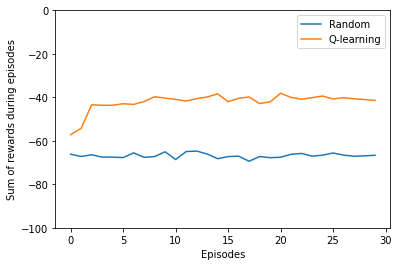

In [ ]:
import matplotlib.pyplot as plt
def plot_rewards(plots):
    plt.figure()
    for plot in plots:
        method, method_title = plot
        plt.plot(method, label=method_title)
    # plt.plot(r_qlearning, label='Q-learning')
    plt.xlabel('Episodes')
    plt.ylabel('Sum of rewards during episodes')
    plt.ylim([-100, 0])
    plt.legend()
    plt.show()


rewards_random /= runs
rewards_qlearning /= runs

plot_rewards([[rewards_random, 'Random'], [rewards_qlearning, 'Q-learning']])


 
## Observations and Conclusions

The implemented setting involved n=1, m=3 and a probability distibution of (.2, .6, .2) for the arrival of patients in a region. It was noted in the study that a more homogeneous distribution impeded learning for the Q-Learning algorithm. At the end, the selected characterisation was one that involved a region with a probability of more than 50%. This assumption is realistic because the rate of patients is considerably higher in the densest regions, which in places like Mexico City, are in the central neighbourhoods.


Moreover, the discount factor,Gamma($\gamma$), has to be lower to achieve a greater learning and better performance.Epsilon($\epsilon$) has to be lower because there aren't too many things to explore.


A problem with this setting is the increasing exponential rate in the action and state space size for each ambulance that is introduced in the system. In a big n this affects the estimation of state-value function and makes it impossible to converge to a solution.

Additionally, in many Emergency Systems,e.g. Mexico City, ambulances are part of the system, but they are independent from the authority and they act on their own will under the law. This is an important fact to consider and that would be analysed in the next multiagent section.

---



## Linear Approximation

Given that the state and action space that we examine are relatively small compared to the problem at hand in the real world, we briefly mention the implemntation of linear approximation of Q-learning. The idea is to approximate the Q-values once the state and action spaces are significanlty larger and thus can impede the straightforward implementation of the Q-learning algorithm due to the added complexity. A specific concept for the Linear Approximation in our problem is that the coefficients in certain cases need to be kept constant at 0:thus some cases shouldn't add influence to the overall estimation. The state-action pairs that need to be excluded are two: given that the state of a particulat ambulance is the left-most position,$s$[1] or $s$[0], depending on the notation, the ambulance isn't able to make a Left move, thus $a$[1] or $a$[0],again depending on the choice of notation. The other case is when the state-action pair define the rightmost state and $a$[R]. Thus, the linear approximation is going to have 2 less coefficients to be determined. In the case discussed above, the state-action pairs will decrease from 9 to 7.

We want to create an approximate function. We have the following options:
1. A function receives a $(s,a)$ and ouputs $Q(s,a,w)$
2. A function receives a state (s) and outputs $Q(s,a_1;w),...,Q(s,a_{|A|};w)$ 


An important note is: the state Action space depend on number of players: $3^n$ 

## Fitted Q Iteration algorithm
- initialize $\hat Q$, $\bar{Q}$, k = 0.
- While (k < K) Repeat: 
    - Generate enought data $\{(S_t,A_t,R_t,S_{t+1}) \}_{t=1}^T$ using policy derived from $\hat Q $ with epsilon-greedy.
    - Compute $\hat{Q}$ as the argmin of:
        $\hat{Q} = argmin_w \sum_{t=1}^T[R_t+max_a \bar{Q}(S_{t+1},a)-Q(S_t,A_t;w)]$
    - $\bar{Q} = \hat{Q}$
    

In [4]:
from tensorflow import keras
import tensorflow as tf 
from keras import layers

n = 2
m = 5

approximation = keras.Sequential(name='q_approximation')
approximation.add(layers.Input(m))
approximation.add(layers.Dense(9,activation='relu'))
approximation.add(layers.Dense((9)))
approximation.summary()

approximation.compile(
    optimizer=tf.optimizers.SGD(learning_rate=0.1),
    loss='mean_squared_error')



Model: "q_approximation"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 9)                 54        
                                                                 
 dense_3 (Dense)             (None, 9)                 90        
                                                                 
Total params: 144
Trainable params: 144
Non-trainable params: 0
_________________________________________________________________


In [ ]:
import numpy as np

class City:
  """
    City environment. It simulates where agents arrive and  where ambulances are taken after
    a patient is attended.
  """

  def __init__(self, ambulances, regions, T, p):
    self.n = ambulances
    self.ambulances = [0]*self.m
    self.m = regions
    self.reward = None
    self.state = [0]*self.m
    self.is_terminal = None
    self.T = T
    self.time_counter = None
    self.distribution = p


  def reset(self):

    self.reward = 0.0
    self.is_terminal = False
    self.time_counter = 0 
    
    for ambulance in range(0, self.n):
        position = np.random.choice(range(0,self.m))
        
        self.ambulances[ambulance] = position
        
        self.state[m] += 1
        
    return self.state  

  def patient_arrival(self):
    return np.random.choice(range(0,self.m),p = self.distribution)




  def step(self, actions: str)-> (list, int, bool):
    """
      One step decision from the central planner:
      actions: n string with the decision of ambulances, e.g 102, 012, 021 etc. 
    """

    def action2state(action):
        for ambulance in range(0, self.n):
            new_state = [0]*self.m
            action = actions[ambulance]

            if action == 1:
                self.ambulances[ambulance] = (self.ambulances[ambulance]-1)%self.m
            elif (action == 1)
                self.ambulances[ambulance] = (self.ambulances[ambulance]+1)%self.m 
                
            new_state[ self.ambulances[ambulance] ] += 1 
    
    return new_state

    self.state = action2state(action)
    
    
    m_incident = self.patient_arrival()
    #print(m_incident)
    if self.state[m_incident] != 0:
      movement = np.random.randint(0,self.m)

      self.state[movement] = self.state[movement] + 1   
      self.state[m_incident] = self.state[m_incident] - 1
      self.reward = 0
        
    else:
      self.reward = -1 

    self.time_counter += 1 

    if self.time_counter == self.T:
      self.is_terminal = True     

    return self.state, self.reward, self.is_terminal
    


In [48]:
def base(ambu, n):
    s = ''
    
    if n < 3:
        n = str(n)
        for _ in range(0,ambu-len(n)):
            n = "0"+n
        return str(n)

    while n != 0:
        s = str(n%3) + s
        n = n//3
        
    for _ in range(0,ambu-len(s)):
        s = "0"+s
        
    return s

In [54]:
base(100,200000000000000000000000000000000000000000000000)

'1011102200212000122202010121110011222012000121002011012221120122101010001001100102220120020001101102'

In [ ]:
import numpy as np

episodes = 30
runs = 20

rewards_qlearning = np.zeros(episodes)
rewards_random = np.zeros(episodes)

p = [.2,.6,.2]

env_fitted_q_learning = City(n, m, 100, p)
env_random = City(n, m, 100, p)



for r in range(runs):
    print(r)

    # // Borrar esto
    q_qlearning = create_q_qlearning(env_q_learning.m)
    q_random = create_q_qlearning(env_random.m)

    for i in range(episodes):

        
        state_q = env_q_learning.reset()
        state_random = env_random.reset()

        done_q = False
        done_random = False

        g_q = 0.0
        g_random = 0.0       
  
            
        #Q-Learning
        while not done_q:
            
            # // Cambiar a fitted
            a_q = eps_greedy_policy(q_qlearning[str(state_q)])


            #print((state_q, change_state, a_q))
            next_state_q, r_q, done_q = env_fitted_q_learning.step(a_q)

            #print((state_q, change_state, next_state_q, r_q, done_q, a_q))
            g_q += r_q

        # // Make algorithm learn
        
        
        # // Change of target.
        
        
        #Q-Learning
        while not done_random:
            
            a_r = np.random.choice(actions)

            change_state_random = change(state_random,a_r)


            #print((state_q, change_state, a_q))
            next_state_random, r_random, done_random = env_random.step(change_state_random)
            g_random += r_random

            state_random= next_state_random
            



        rewards_qlearning[i] += g_q
        rewards_random[i] += g_random

# Independent Ambulances without a Central Planner


Mexico City and many cities do not have a centralised system. In fact, the case is often the opposite: ambulances belong to independent companies and they attend patients based on their own objectives, information, and values. 

In this section we analyse what is the result of these circumstances in the emergency system. To attain insight we model the Emergency System as a Multi-Agent Reinforcement Learning, where all ambulances are competing among themselves to attend patients as soon as possible. In particular the framework that will be used is Markov Stochastic Games. 


## Markov Stochastic Game

**General Setting**

We solve a Markov Stochastic Game as described in (Zhang, Kaiqing, et al, 2021) to model the problem of many ambulances in a city making decisions. 
The Markov Stochastic Game is a competitive game between the agents and it is defined in the following way:
- $[n]$ ambulances are in the system.
- The state space for an ambulance $S^{i}$ is the location of ambulances in the city. Thus, ambulances can see where all the other units are located.
- The action space for ambulance $i$ is define as $A^{i} = \{L,R,Stay\}$. Where $A = A^1 \times ...  \times A^n$ is the joint action space.
- The transition probability corresponds to a mapping $P: S \times A \rightarrow \triangle(S)$. As before it is stochastic where a patient will exist and the location to which the patient will be taken by the ambulance.
- The rewards is -1 for each step they haven't attended a patient and (n-1) in each case they have attended a patient. 

Each ambulance tries to minimise its expected waiting time between patients they attended, or alternatively maximise the number of patients it attends. 



## Analysis of the Stochastic Game

**Nash equilibria**
Usually, an interest in literature is to analyse the convergence of the system to a Nash Equilibrium. 

**Definition. Nash Equilibrium** A Nash Equilibrium in a Markov Game is a joint policy $\pi^* = (\pi^{*1}, ..., \pi^{*N})$. Such that for any $s \in S$ and $i \in N$.

$$V^i_{{\pi^*i},{\pi^*-i}} \geq V^i_{{\pi^i},{\pi^*-i}} \text{for any } \pi^{i}$$

Nevertheless, looking for Nash Equilibria in Stochastic Games assumes the rationality of the agents while playing with other agents, which in our system means they know where the other agents are and rationality in the way in their decision-making. 

Additionally, it has been noted that it is very expensive to analyse Markov Stochastic Games that try to reach a Nash Equilibrium. Even the simplest case, a three player game in a bimatrix equilibria is PPAD-complete (Daskalakis, 2006). Recent literature points out that even Coarse Correlated Equilibria in Multi Agent Systems is NP-hard.[3]

In our problem analysis we don't seek to achieve a Nash Equilibria. Our problem focuses on analysing the effect of the decisions, caused by the learning agents given the information they have. 

**Possible Non - Convergence in Stochastic Games**
A problem with Markov Stochastic games is the possible non-stationarity of the system, due to the dependency of each agent for the transition of states and outcome of the system.

Theoretically if an agent ignores non-stationary environment with an independent learning strategy, it is not guaranteed that the result will converge.[2]

Nevertheless, as mentioned in (Ming, 1993) and (Laetitia et al. 2012)  single-agent independent learning achieves satisfactory results in practice.[12][7]




**Single-Agent Learner Assumption**

To avoid the problem of non-stationarity, we assume the ambulances are single agent learners. In particular, at the beginning of each step a queue of ambulances is drawn from a random distribution and each ambulance chooses its best response dynamic by using Q-learning method and the private information about the environment. 

An implication of the assumption is that the agents treat the other ambulances as if they were part of the environment, which allows the model to be treated as Markovian.[2]
There is a price to pay in this assumption: either the assumption would be realised and the agents would converge to a Nash Equilibrium or it will not converge (Jaakkola et al., 1994).




## Single-Agent Q-Learning: Pseudocode
- **Initialisation**: arbitrary Q.
- **Repeat** for each episode:
- **Initialise** state s
- **Repeat** for each step of the episode: \\
  - Generate random queue of ambulances.
  - **Repeat** for each ambulance: \\
    - a ← action s using policy derived from ϵ-Greedy\\
    - Take action \\
  - Observe reward r and next state s'
  - **Repeat** for each ambulance \\
    - $Q(s,a) \leftarrow Q(s,a)+\alpha[r+ \gamma \ max_{a'} Q^{opt}(S_{t+1},a')]$ \\
    - $s \leftarrow s'$ \\
  - **Stop Until** s is a terminal state.


In [ ]:
class City_multiagent(City):
    def __init__(self, ambulances, regions, T, p):
        super().__init__( ambulances, regions, T, p)
        self.ambulances = list()
        self.time_counter = 0

    def reset(self):
      self.reward = 0.0
      self.is_terminal = False
      self.time_counter = 0      
      return self.state 
        

    def create_ambulances(self):
      
      new_state = [0]*self.m
      for i in range(self.n):

        random = np.random.randint(0,self.m)
        self.ambulances.append(Ambulance(i, random, self.m))
        new_state[random] = new_state[random] + 1

      
      self.state = new_state

    def step(self, action):
      """
        One step decision from the central planner:
        action: m tuple with the position of ambulances, 
        constrained on n, over the sum of ambulances in all the regions.
      """

      new_state = list(action)
      m_incident = self.patient_arrival()


      #print(m_incident)
      if action[m_incident] != 0:
        #print(f"inci {action[m_incident]}")
        ambulance_rank = np.random.randint(0,action[m_incident])  
        movement = np.random.randint(0,self.m)

        new_state[m_incident] = new_state[m_incident] - 1
        new_state[movement] = new_state[movement] + 1   
        self.reward = 0
        self.state = new_state

        
      else:
        ambulance_rank = -1
        movement = -1
        self.reward = -1 
        self.state = action
       

      self.time_counter += 1 

      if self.time_counter == self.T:
        self.is_terminal = True     


      return self.state, self.reward, self.is_terminal, m_incident, movement, ambulance_rank

    def transition_state(self):
      transition_state = [0]*self.m
      for ambulance in self.ambulances:
        #print(ambulance.position)
        transition_state[ambulance.position] += 1

      return transition_state



In [ ]:
class Ambulance:
  def __init__(self, number, position, regions):
    self.position = position
    self.seen_state = None    
    self.rewards_qlearning = np.zeros(episodes)
    self.g_q = 0.0
    self.number = number
    self.q_qlearning = dict()
    self.a_q = None
    self.m = regions
    stay = 0
    left = 1
    right = 2

    self.actions = [stay, left, right]



  def set_postion(self, action):
    #if self.position>0 and self.position<
      self.a_q = action
      self.position = [self.position,self.position-1,self.position+1][action] 

  def q_qlearning_(self, state):
    
    if state not in self.q_qlearning.keys():
      print(state)
      self.q_qlearning[state] = [0]*3

    return self.q_qlearning[state] 

  def eps_greedy_policy(self, qsa, epsilon=0.01):
    
    actions = self.actions
    if (self.position == 0):
      actions = [stay, right]
      get_items = itemgetter(0,2)
      qsa = get_items(qsa)

    elif (self.position == self.m-1):
      actions = [stay, left]   
      get_items = itemgetter(0,1)
      qsa = get_items(qsa)

    if np.random.binomial(1, epsilon) == 1:              
        return np.random.choice(actions)
    else:
        a_q = np.random.choice([action_ for action_, value_ in enumerate(qsa) if value_ == np.max(qsa)])
        if self.position == 0 and a_q == 1:
          a_q = 2
    
        return a_q




  def q_learning(self, qsa, next_qs, r, alpha=0.1, gamma=.3):  
      return qsa + alpha * (r + gamma * np.max(next_qs) - qsa)

    #print(self.q_qlearning)
    
  



In [ ]:
import numpy as np
from operator import itemgetter
import random

episodes = 100
runs = 10

rewards_qlearning_cp = np.zeros(episodes)

p = [.2,.6,.2,0]

env_q_learning = City_multiagent(2, 4, 100, p)
env_q_learning.create_ambulances()


for r in range(runs):
    print(r)



    for i in range(episodes):

        state_q = env_q_learning.reset()

        done_q = False
        g_q_cp = 0.0
            
        #Q-Learning
        while not done_q:


          random.shuffle(env_q_learning.ambulances)

          
          for ambulance in env_q_learning.ambulances:
            #For each ambulance

              #print(f"State: {str(state_q)}")
              ambulance.seen_state = state_q
              a_q = ambulance.eps_greedy_policy(ambulance.q_qlearning_(str(state_q)))
              #print(ambulance.q_qlearning)
              #print(f"Action: {a_q}")
              ambulance.set_postion(a_q)

              change_state = env_q_learning.transition_state()

              state_q = change_state

          # All ambulances changed the state
          #print((state_q, change_state, a_q))
          next_state_q, r_q, done_q, m_incident, movement, chosen_ambulance = env_q_learning.step(change_state)
          #print(( change_state, next_state_q, r_q, m_incident, movement, done_q, a_q, chosen_ambulance))
          g_q_cp += r_q
          counter = 0
          for ambulance in env_q_learning.ambulances:


              #Fix this. 

              if ambulance.position == m_incident:
                #print(f"position: {ambulance.position}")
                #print(f"counter: {counter}, ambulance = {chosen_ambulance}")                
                if counter == chosen_ambulance:

                  ambulance.position = movement
                  a_rq = env_q_learning.n - 1
                  #print(f"sí entró {ambulance.position}")
                
                counter += 1 
              else:
                a_rq = -1                

              #print((str(state_q), str(next_state_q)))
              ambulance.g_q += a_rq
              options = ambulance.q_qlearning_(str(next_state_q))
              current = ambulance.q_qlearning_(str(state_q))[ambulance.a_q]
              # Q-learning updates, note the second argument
              ambulance.q_qlearning[str(ambulance.seen_state)][ambulance.a_q] = ambulance.q_learning(current, options, a_rq)
              #print(ambulance.q_qlearning)
              #print(q_qlearning)
              state_q = next_state_q

   
        rewards_qlearning_cp[i] += g_q_cp     

        for ambulance in env_q_learning.ambulances:
          ambulance.rewards_qlearning[i] += ambulance.g_q
          ambulance.g_q = 0.0


0
[0, 2, 0, 0]
[0, 1, 1, 0]
[0, 0, 2, 0]
[0, 0, 2, 0]
[0, 1, 1, 0]
[1, 0, 1, 0]
[1, 0, 1, 0]
[1, 0, 0, 1]
[1, 0, 0, 1]
[1, 1, 0, 0]
[1, 1, 0, 0]
[0, 1, 0, 1]
[0, 0, 1, 1]
[0, 1, 0, 1]
[0, 0, 1, 1]
[0, 0, 0, 2]
[0, 0, 0, 2]
[0, 2, 0, 0]
[2, 0, 0, 0]
[2, 0, 0, 0]
1
2
3
4
5
6
7
8
9


In [ ]:
rewards_qlearning_cp

array([-431., -432., -450., -465., -490., -460., -440., -429., -449.,
       -480., -467., -459., -446., -466., -455., -418., -427., -419.,
       -399., -406., -433., -414., -442., -427., -435., -397., -433.,
       -442., -426., -396., -416., -420., -437., -451., -406., -425.,
       -395., -453., -412., -414., -462., -409., -426., -450., -433.,
       -412., -435., -428., -397., -434., -415., -421., -399., -414.,
       -450., -429., -405., -413., -403., -409., -414., -403., -443.,
       -438., -409., -421., -455., -427., -427., -405., -415., -427.,
       -435., -403., -390., -421., -434., -438., -392., -409., -439.,
       -395., -425., -415., -434., -437., -464., -399., -430., -396.,
       -369., -359., -425., -430., -423., -375., -458., -396., -414.,
       -434.])

In [ ]:
for i in range(env_q_learning.n):
  print(env_q_learning.ambulances[i].rewards_qlearning)


[-298. -276. -298. -326. -302. -284. -256. -236. -284. -346. -326. -328.
 -262. -298. -312. -222. -256. -290. -228. -230. -288. -318. -292. -246.
 -244. -218. -230. -300. -296. -230. -252. -276. -314. -288. -284. -296.
 -252. -320. -256. -270. -288. -224. -278. -318. -260. -240. -326. -312.
 -314. -312. -288. -282. -232. -248. -258. -272. -234. -274. -222. -224.
 -202. -248. -296. -298. -226. -258. -332. -264. -258. -290. -300. -270.
 -340. -254. -304. -306. -252. -348. -272. -292. -326. -254. -280. -274.
 -338. -292. -330. -212. -302. -234. -220. -162. -256. -260. -264. -200.
 -338. -236. -218. -306.]
[-262. -282. -326. -350. -388. -322. -276. -298. -300. -330. -292. -282.
 -290. -336. -280. -266. -292. -266. -280. -260. -288. -196. -304. -276.
 -300. -242. -300. -290. -262. -240. -254. -230. -260. -302. -256. -280.
 -210. -284. -214. -254. -334. -242. -244. -272. -254. -282. -260. -246.
 -212. -264. -268. -250. -224. -270. -318. -266. -252. -252. -254. -288.
 -268. -228. -292. -218. 

In [ ]:
import pprint

for i in range(env_q_learning.n):
  print(f"Ambulance {i+1}")
  pprint.pprint(env_q_learning.ambulances[i].q_qlearning)


Ambulance 1
{'[0, 0, 0, 2]': [-1.1013836239655974, 0.10958737000000002, 0],
 '[0, 0, 1, 1]': [-1.036847437585972, 0.16979884532904724, -0.9480007463790864],
 '[0, 0, 2, 0]': [-0.8563936266878179, -0.1923398517109, -0.854953427258105],
 '[0, 1, 0, 1]': [-1.0291846847274915,
                  0.10651000000000001,
                  -0.8295527033091146],
 '[0, 1, 1, 0]': [-1.0271803266070751,
                  0.007000000000000006,
                  -0.7201668523701025],
 '[0, 2, 0, 0]': [-0.8295636003505017,
                  0.09520222900000001,
                  -0.6324162746101619],
 '[1, 0, 0, 1]': [-1.0230929168574883, -0.27949, -0.5539401671330922],
 '[1, 0, 1, 0]': [-1.0187490639463679, -0.1599257, -0.6722646471491457],
 '[1, 1, 0, 0]': [-0.9002850873653906, -0.1, -0.49786861968038276],
 '[2, 0, 0, 0]': [-0.8892056526282117, 0, -0.4775593471491457]}
Ambulance 2
{'[0, 0, 0, 2]': [-0.7612403165401, -0.4950503249086621, 0],
 '[0, 0, 1, 1]': [-0.798150180266563, -0.2662298766557546, -0

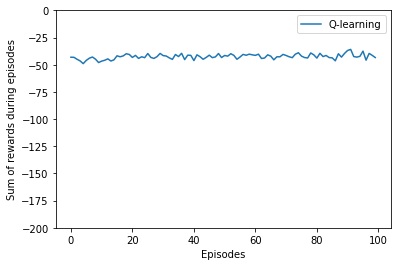

None


In [ ]:
import matplotlib.pyplot as plt
def plot_rewards(plots):
    plt.figure()
    for plot in plots:
      method, method_title = plot
      plt.plot(method, label=method_title)
      # plt.plot(r_qlearning, label='Q-learning')
      plt.xlabel('Episodes')
      plt.ylabel('Sum of rewards during episodes')
      plt.ylim([-200, 0])
      plt.legend()
      plt.show()





print(plot_rewards( [[rewards_qlearning_cp/runs, 'Q-learning']]))


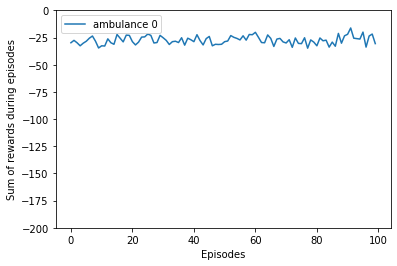

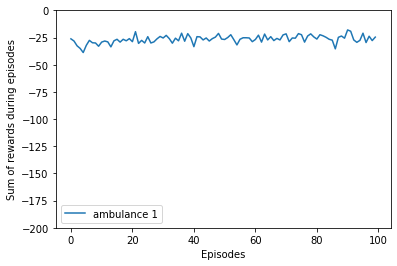

None


In [ ]:
print(plot_rewards( [(env_q_learning.ambulances[i].rewards_qlearning/runs, f"ambulance {i}") for i in range(env_q_learning.n)]))

## Observations and Conclusions

The results in the experiment of n=2, m=4 and p = (.2 , .6 ,. 2 ,0 ) are quite surprising. Even though there are more agents in the system, the amount of patients that are unattended is approximately the same as the average best solution of the achieved learning result in the first setting. 

Moreover, the ambulances do not learn a better way to minimise their expected waiting time. This could be caused by the lack of convergence in the estimation of the state-action function. 


---




# Information Design: Central Planner Sends Recommendations to Ambulances



This section proposes a solution for the ambulance problem inspired by the seminal work of Kamenicka and Gentskow in 2011 and the recent implementation as a Markov Persuasive Model by Wu in 2022.[6][12]

In this model we have the same setting as before, but now the central planner and independent ambulances coexist in the same environment. The former tries to minimise lost patients, while the latter-the expected waiting time between patients. The central planner cannot work as a dictator because ambulances are not directly dependent on him, but the central planner has more information than ambulances about the arrival of patients in the city, and it can use that information to his advantage to persuade the ambulances into taking particular actions. Recall that ambulances only know their private information about the rate of patients, based solely on their own experience.
As a consequence, the central planner needs to design a persuasion signalling message for each ambulance privately, subject to ensuring that the ambulances will be obedient.




## Information Design Preliminaries

Information design focuses on two agents: a sender with a utility function $v$, and a receiver with utility function $u$. Both utility functions depend on $\omega$, which is the realised outcome of certain environment uncertainty, and $a$, which are the actions of the receivers. The main concept behind the persuasion problem is how does the sender reveal information about $\omega$ s.t. the expectation of the utility function $v$ is maximised.
The sender follows a signalling scheme which is the conditional distribution of the signal, random variable, given the outcome of $\omega$. Once the outcome $\omega$ is available, the sender samples a signal and sends it to the receiver, which in turn chooses an action,$a$, based on Bayes’ theorem s.t. her expected utility function,$u$, is maximised. The optimal signalling schemes are often direct and persuasive: direct signal schemes imply that each signal will induce a recommended action for the receiver, while persuasive signal schemes imply that the recommended action maximises $u$. Persuasiveness is defined as:
$$Pers(\mu,\{V(s)^i\}_{i=1}^n) = \{\pi_t: S \rightarrow
P^n : \sum_{\omega \in \Omega} \mu (\omega)\pi(a|s,\omega)[Q^i(s,a)-Q^i(s,a')], \ \forall i \in [n],a,a' \in A^i, s \in S \}
$$
where the π term indicates the probability of action a being recommended given that $\omega$ outcome has occurred, while the 𝞵 term indicates the priori from which the environment uncertainty is drawn.[12]


## Markov Persuasive Model




Markov Persuasion Processes (MPPs) introduce the idea of information
processors and decision makers. The sender’s aim is to influence the myopic receivers in such a way that their actions maximise the sender’s cumulative utilities, in this case rewards. MPPs assume a finite horizon Markovian environment with varying prior and utility functions which is indeed the case in the ambulance problem. MPPs find the optimal policy,given that the state space is finite, by adding persuasion to the Bellman equation.



## The Model

Ambulances have the same action space: Left, Right, or Stay. 

The central planner has two types of information: state and outcome. The first one is as before, while the second one is the knowledge about rate of arrival of patients in each region. The outcome has a prior distribution. 
The central planner use this outcome information to create the signals to ambulances about where to position themselves. 

As before the state changes due to the ambulance's actions. The payments of both the ambulances and the Central planner depend on the joint action of all ambulances. The probability transition is affected by the state, action, and the revealed information $\omega_h$ which is the place where the patient appeared $P_t(s_{t+1}|s_t,\omega_t,a_t)$. 
The central planner has a prior of what $\omega_h$ is going to be, and it is the only one that always sees the realised $\omega_h$, while the only time an ambulance sees a realisation is when it attends a patient. 

The MPP goes as follows.
1. There are ambulances and each doesn't know any prior distribution about the arriving rate of patients, just what they have learnt through their own experience. Their reward is as before: $-(n-1)$ if they don't attent a patient in the step $t$, and 0 otherwise.

2. The sender can see the valuation of each ambulance and it commits to a persuasive signal $\pi_t: S \rightarrow
P^n$ where $P$ is a mapping from $\Omega \rightarrow △(A)$ - a probability distribution of where a patient will be, for each ambulance.

3. The central planner receives the call for the patient in a region (realized $\omega_t$). Subsequently,it recommends to the receiver to take an action $a_t \sim \pi_t(.|s_t, \omega_t )$. 

4. Given the recommendation of the action $a^i_t$, all ambulances take an action $a'^{i}_t$ and get a reward. 

5. The ambulance that got the patient is moved to another region and so a new state $s_{t+1}$ is realised.

We restrict the policy of the central planner to be persuasive.

$$Pers(\mu,\{V(s)^i\}_{i=1}^n) = \{\pi_t: S \rightarrow
P^n : \sum_{\omega \in \Omega} \mu (\omega)\pi(a|s,\omega)[Q^i(s,a)-Q^i(s,a')], \ \forall i \in [n],a,a' \in A^i, s \in S \}
$$
## Optimal Ambulances Problem

It is the same as the one in setting 2. They want to minimise the expected discounted reward in a finite horizon, namely:
$$V^{\pi,i} (s) = E[\sum_{t=1}^T \gamma^{i-1} R^i_t|S_t = s]$$

Similarly to setting 2, ambulances are independent learners and take the moment given. 

The Q-function for the ambulance is as before $Q^{Pi}_t: S \times A \rightarrow \mathbb{R}$ 

## Optimal Signal Policy Problem in MPPs

The value function of the central planner is as before, but it also takes $P$ and $\mu$ into consideration:

$$V^{\pi}_{P,\mu} (s) = E[\sum_{t=1}^T  \gamma^{i-1} R^i_t|S_t = s]$$

The reward is -1 if the patient wasn't attended and 0 otherwise.

We define the Q-function as $Q^{Pi}_t: S \times \Omega \times A \rightarrow \mathbb{R}$

For any Q-function:
$$⟨Q_t, \mu_t \otimes \pi_t ⟩_{\Omega \times A} = E_{ \omega  \sim  μ_t, a \sim \pi_t(.|s,\omega)} [Q_t(s, \omega, a]$$

The bellman optimality equation is:

$$V^*_t(s) = max_{\pi'_t \in Pers(\mu,\{V(s)^i\})} ⟨Q^*_t, \mu_t \otimes \pi_t ⟩_{\Omega \times A}$$

[12]






## Reinforcement Learning Problem

In real life prior about the state of the world or the distribution of arrival of agents per region is unkown to the central planner. Additionally, the transtion of state to state, given by the movement of ambulances after they attended a patient is unkown. This uncertainty suggests the use of a Reinforcement Learning approach to the sequential decision optimisation of the central planner described above.

To solve this problem, the paper from Wu et al.  tackles the lack of knowledge of utility functions, prior distributions, and the Markov transition kernels, by introducing the Optimism-Pessimism Principle for Persuasion Process. The OP4 algorithm introduces a novel combination of pessimism and optimism in addition to the general optimal policy. Exploration is encouraged through the optimism terms, while the signalling policy of the sender is robustified through pessimism terms in order to prevent the decision makers’ harmful equilibrium behaviour.

**Pessimism**

Given the set of data, the true value of 𝞵t is not obtainable. Instead, before each episode, we construct a confidence region that contains the true priore with a high probability. Afterwards, we find the signalling policies that are persuasive towards all distributions in the confidence interval. Given that the confidence region is accurate, the signalling policy is persuasive in terms of the true prior with certainty. The aim of pessimism is to prompt robust equilibrium dynamics.

**Optimism**

The uncertainty of the Q-function is a reflection of the uncertainty about the underlying model. The addition of the uncertainty recommends actions with high uncertainty, which in turn results in the receiver taking the particular action, given that the condition of persuasiveness is satisfied. The aim of optimism is to motivate exploration alongside exploitation.
The principles of pessimism and optimism are further intertwined in the OP4 algorithm as follows:

- **for** episode *t*=1...*T* **do**

  > Receive the initial state {$s_1$} at time *t*

  > for each step $h \in H$ 
  estimate prior $\mu_h^t$ along the confidence interval $\mu_B$, and construct an optimistic *Q*-function $Q_h^t$ iteratively with the value function $V_h^t$

  > **for** step *h*=1,...*H* **do**
  >> Choose robust signaling sceheme $\pi_h^t \in argmax_{\pi_h \in Pers(\mu_B,u_h)} ⟨Q^*_t, \mu_t \otimes \pi_t ⟩_{\Omega \times A}(s_h^t;C^t)$

  >> Observe state $s_h$, outcome $\omega_h$ and accordingly recommend action $a$~$\pi_h^t(\omega_h,.)$ to the receiver.

  > **end for** 

  **end for**

One of the main challenges is the tradeoff between uncertainty and revelation of the full information for both the environment and receivers. In the case of uncertainty, the optimal policy might not lead to the desired actions of the decision makers due to lack of persuasiveness, while in the complete information environment, decision makers' actions tend to converge to a suboptimal cumulative reward for the sender, in our case the central planner.[12]

**Challenges of the Reinforcement Learning Problem in our model**

Compared to Wu et al. paper, our model has independent ambulances that don't disappear when they take an action, but keep learning through all the episode. This is an extra complication and it is not assured that OP4 could work. The particular questions to attend are the following:
- How to establish an algorithm that addresses the problem of learning the outcome distribution to design the signal policies while taking into consideration that the receivers (ambulances) would be learning what the central planner suggests via signals?
- Does this algorithm achieve a stable solution at each iteration after being trained?
- Is there a suboptimal outcome of the algorithm when you introduce learning agent that lives through all the episode versus the ones that disappear as defined by Wu et al.?


---



# Ehtical Implications/Further Applicable Suggestions
Considering the fact that human lives are at stake, it will be expected that the nature of the algorithm is shared at least with the people in charge of the state. Given that the algorithm implies that not all information available is shared at all times, this can lead to significant moral and ethical discussions and might even be scraped off despite potentially decreasing the death rate amongst cases where ambulances are involved. However, we believe that if the algorithm achieves better performance than the status quo, ethical dilemmas will be overcome. 

In real life, the ambulance response time often depends on the severity of each case. Thus, it will make sense to implement a severity metric that would suggest which patient should be attended first, considering the fact that at each time step in real life applications more than one patient would appear. This would further increase the complexity of the algorithm, but it may significantly improve the performance with regards to the most important metric: human lives. This suggestion is based on John Rawls' maximin criterion with regards to fairness and justice. The 20th century philosopher suggests that a just system will maximise the position of the least fortunate people, in our case patients in the emergency health system.[9]




---





# Further Applications
**Urban Planning**:
Considering the increasing size and density of megacities, the idea of creating a system of independent and self-sufficient regions/neighbourhoods seems like an optimal solution towards the problem of overpopulation and inequality between living conditions of individuals. We propose implementing the MPP model, defining an urban planner as the sender, and a set of real estate companies/developers as the receivers. The idea is to optimise the land available for future projects in such a way that each region is self-sufficient. We define the utility function of the urban planner as the sum of ‘self-sufficiency’ coefficients of all regions within the city that can be determined by various parameters such as the number of shops,residential buildings, hospital etc. per area/residents. The utility functions of each real estate developer is defined as their expected profit from undertaking a project, based on expected prices and sale rate. Each parcel of land is dedicated to a particular set of buildings,e.g. residential, thus enabling the sender to send various signals to different real estate developers based on their interests/specialisation. This will induce the application of auction theory as well since we assume that a set of companies will be informed of an available parcel. This will also maximise income for the state as the conflict between companies will theoretically lead to higher prices. One way to induce persuasiveness is to set an upper bound of the informed developers per parcel. In addition, the sent signal should avoid informing the same set of companies for multiple parcels. For example, we would rather have company A against companies B and C for one parcel, and company A against companies E and D for another. Thus, we aim to avoid overlapping companies in more than 1 auction. This limits the set of possibilities for signalling policies, but tackles the problem of cooperation between companies: e.g. if two companies were aiming for a parcel each and they were allocated in two different auctions, they could use their resources with weights w1=(1,0) and w2=(0,1) respectively in order to maximise the probability of obtaining a single parcel.  


---

# Conclusion

The report focuses on the implementation of Reinforcement Learning algorithms, aiming at the improvement of ambulance allocation within a city and respectively decreasing the number of human lives lost. The first two settings produce similar results, that don't conclude which of the two systems would produce better results in real life. The third setting will potentially produce the best performance, but its complexity shouldn't be undermined especially when it comes to such a dynamic and complex environment as the emergency system in Mexico City. The MPP model could present some ethical issues, but its implementation would ensure that response time is optimised and decreases the chance of mistakes,often made by human interactions and decisions. Thus,we believe that Reinforcement Learning implementation in ambulance allocation will produce the best results for society in general:decreasing the number of human lives lost. 


---



# References
- [1] Aristi Reina, Francisco. “Regla De Asignación Eficiente De Ambulancias En Un Entorno Dinámico.” ITAM, 2019. 

- [2] Bowling, Michael, and Manuela Veloso. “Rational and Convergent Learning in Stochastic Games.” IJCAI’01, vol. 2, Aug. 2001, https://doi.org/1642194.1642231. 

- [3] Daskalakis, Constantinos, et al. “The Complexity of Markov Equilibrium in Stochastic Games.” ArXiv, 8 Apr. 2022, https://doi.org/arxiv:2204.03991v1. 

- [4] Foerester, Jakob, et al. “Stabilising Experience Replay for Deep Multi-Agent Reinforcement Learning.” International Conference of Machine Learning, 2017, pp. 1146–1155., https://doi.org/10.48550/arXiv.1702.08887. 

- [5] Jackson, Matthew O. “Mechanism Theory.” SSRN Electronic Jour-
nal, 2014, doi:10.2139/ssrn.2542983.

- [6] Kamenica, Emir, and Mathew Gentzkow. “Bayesian Persuasion.” American Economic Review, vol. 101, no. 6, Oct. 2011, pp. 2590–2615., https://doi.org/10.1257/aer.101.6.2590. 

- [7] Matignon, Laetitia, et al. “Independent Reinforcement Learners in Cooperative Markov Games: a Survey Regarding Coordination Problems.” The Knowledge Engineering Review, vol. 27, no. 1, 2012, pp. 1–31., doi:10.1017/S0269888912000057.

- [8] Mguni, David, et al. “ Coordinating the Crowd: Inducing Desirable
Equilibria in Non-Cooperative Systems.” Prowler, 30 Jan. 2019,
doi:arXiv:1901.10923

- [9] Pecorino, Philip. "Rawls and The Maxi Min Principle." Queensborough Community College,  CUNY: Computers, Information Technology, the Internet, Ethics, Society and Human Values. June 2006.

- [10] Propuesta para hacer más eficiente la atención de Urgencias Médicas en la CDMX. Investigación del C5. Agosto 2019.

- [11] Tan, Ming. “Multi-Agent Reinforcement Learning: Independent vs. Cooperative Agents.” International Conference on Machine Learning, 1993, pp. 330–337. 

- [12] Wu, Jibang, et al. “Sequential Information Design: Markov Persuasion Process and Its Efficient Reinforcement Learning.” ArXiv, 22 Feb. 2022, https://doi.org/10.48550. 

- [13] Zhang, Kaiqing, et al. “Multi-Agent Reinforcement Learning: A Selective Overview of Theories and Algorithms.” Corr, abs/1911.10635, 28 Apr. 2021, https://doi.org/arxiv:1911.10635v2. 



---

#️Contribution 
Both team members have contributed equally.
